<a href="https://colab.research.google.com/github/dipayandas97/Spiking-Neural-Network/blob/master/LIF_neuron_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#LIF neuron class

In [0]:
class Neuron(object):
    def __init__(self, threshold=1, dt=0.125):
        #simulation parameters
        self.dt = dt

        #LIF parameters
        self.Vres = 0                        #resting potential (V)
        self.Vm = self.Vres                       #current potential (V)
        self.tau_ref = 4                     #(ms) : refractory period
        self.t_rest = -1                     #initial resting time point
        self.Vth = threshold                 #(V)

        self.Rm = 1                          #kOhm
        self.Cm = 5                         #uF
        self.tau_m = self.Rm * self.Cm                 #(ms)
        self.V_spike = 0.5                   #spike delta (V)
            
    def update(self, I, time_stamp):
        if time_stamp > self.t_rest:
            self.Vm = self.Vm + (((I*self.Rm - self.Vm) / self.tau_m) * self.dt)
            
            if self.Vm >= self.Vth:
                self.Vm += self.V_spike
                self.t_rest = time_stamp + self.tau_ref
        else:
            self.Vm = self.Vres
        return self.Vm

    def initialize(self):
        self.Vm = self.Vres
        self.t_rest = -1

#Single Neuron

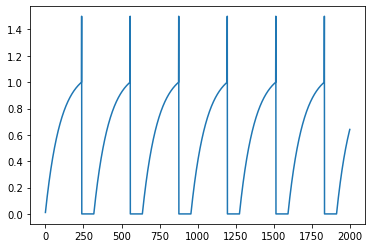

In [0]:
simulation_time = 100 #ms
dt = 0.05             #ms
time = np.arange(0, simulation_time+dt, dt)

n = Neuron(threshold = 1, dt=dt)

spike_trace = []
I = 1.1

for t in time:
    s = n.update(I, t)
    spike_trace.append(s)

plt.plot(spike_trace)
plt.show()

#List of neurons

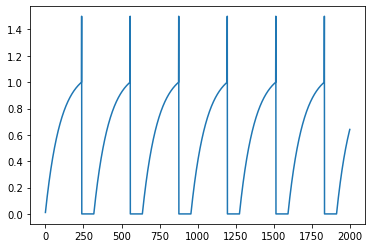

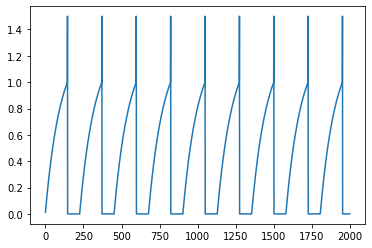

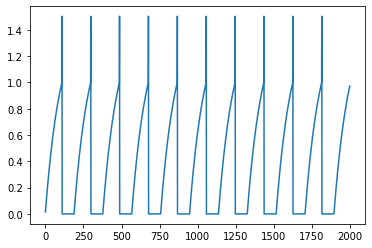

In [0]:
simulation_time = 100 #ms
dt = 0.05             #ms
time = np.arange(0, simulation_time+dt, dt)

neurons = [Neuron(threshold = 1, dt=dt) for i in range(3)]

spike_trace = np.zeros((time.shape[0], len(neurons)))
I = [1.1, 1.3, 1.5]

for idx,t in enumerate(time):
    for i in range(len(neurons)):
        spike_trace[idx,i] = neurons[i].update(I[i], t)

plt.plot(spike_trace[:,0])
plt.show()
plt.plot(spike_trace[:,1])
plt.show()
plt.plot(spike_trace[:,2])
plt.show()